**Name:** Luan Minh Tran

**NetID:** lmt185

**RUID:** 197002611

### Problem Statement
Using PyTorch, set up the pre-trained
network ResNet50. Obtain 10 of your own images that are similar to ImageNet classes
and classify them. Choose 10 images from 5 different classes (2 images per class).
Report the confusion matrix, the accuracy, the f-score, precision and recall of your
classifier. There should be 6 classes representing the 5 classes that your images belong
to as well as an 6th ’other’ class.

### Load required modules

In [ ]:
import torch
import os
from skimage import io, transform
from torch.utils.data import Dataset, DataLoader
import torchvision.models as models
import torchvision.datasets as datasets
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import itertools

In [ ]:
# Load pretrained ResNet50 model
# https://pytorch.org/docs/stable/torchvision/models.html
# Tip: When loading model make sure pretrain argument set to True
# Tip: Good resource for PyTorch projects: https://github.com/pytorch/examples/blob/master/mnist/main.py

device = torch.device('cuda')  # use gpu device
model = models.resnet50(pretrained=True) # load model from torchvision.models
model = model.to(device)  # model operations are sent to GPU

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/hub/checkpoints/resnet50-19c8e357.pth


In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
def loadImage(root_dir):
    dataset = []
    for label in os.listdir(root_dir+"/images"):
      
      dataset+=([[os.path.join(root_dir, 'images/'+label, file),label]
                      for file in os.listdir(root_dir + "/images/"+label)
                          if file.endswith('.jpg')])
    return dataset

In [ ]:
# Create custom Dataset for your images
# https://pytorch.org/tutorials/beginner/data_loading_tutorial.html

class CustomDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        self.transform = transform
        self.root_dir = root_dir
        self.dataset = loadImage(root_dir)
        
        # TODO: load image paths and labels located in the root_dir
        # Tip: append image_path and label pairs into self.dataset
    
    def __len__(self):
        return len(self.dataset)
    
    def __getitem__(self, index):
        image_path, label = self.dataset[index]
        
        image = Image.open(image_path)
        
        if self.transform:
            image = self.transform(image)
        
        return image, label

In [ ]:
# Load all path data,label
root_dir = '/content/gdrive/My Drive/Computer Vision/Projects/'

transform= transforms.Compose(
    [transforms.Resize(size=(224, 224)),
     transforms.ToTensor(),
     transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])])


#Load custome dataset 
custom_dataset = CustomDataset(root_dir, transform)
loader = DataLoader(custom_dataset, batch_size=1)

In [ ]:
temp = []
for (image, label) in loader:
  temp.append(int(label[0]))

label_t = torch.IntTensor(temp)
print(label_t)

tensor([ 71,  71,  76,  76, 107, 107, 340, 340, 576, 576], dtype=torch.int32)


In [ ]:
# # Cycle through custom dataset and pass data into the model
# for (image, target) in loader:
#     image = image.to(device)  # enable GPU operations for image
#     prediction = model(image)
#     scores = model(image) #probability for eac class
#     _, preds = torch.max(scores, dim=1)  # please see docs for an explanation
#     print(preds)
#     # TODO: compute metrics on prediction such as accuracy, precision, etc.

In [ ]:
def check_accuracy(loader, model):
    num_correct = 0
    num_samples = 0
    model.eval()
    
    with torch.no_grad():
        for (image, _), label in zip(loader, label_t):
            image = image.to(device=device)
            label = label.to(device=device)
            
            scores = model(image)
            _, predictions = torch.max(scores, dim=1)
            print(predictions)
            print(label)
            num_correct += (predictions == label).sum()
            num_samples += predictions.size(0)
        
        print(f'Got {num_correct} / {num_samples} with accuracy {float(num_correct)/float(num_samples)*100:.2f}')
check_accuracy(loader, model) 

tensor([71], device='cuda:0')
tensor(71, device='cuda:0', dtype=torch.int32)
tensor([71], device='cuda:0')
tensor(71, device='cuda:0', dtype=torch.int32)
tensor([76], device='cuda:0')
tensor(76, device='cuda:0', dtype=torch.int32)
tensor([76], device='cuda:0')
tensor(76, device='cuda:0', dtype=torch.int32)
tensor([107], device='cuda:0')
tensor(107, device='cuda:0', dtype=torch.int32)
tensor([107], device='cuda:0')
tensor(107, device='cuda:0', dtype=torch.int32)
tensor([340], device='cuda:0')
tensor(340, device='cuda:0', dtype=torch.int32)
tensor([340], device='cuda:0')
tensor(340, device='cuda:0', dtype=torch.int32)
tensor([576], device='cuda:0')
tensor(576, device='cuda:0', dtype=torch.int32)
tensor([576], device='cuda:0')
tensor(576, device='cuda:0', dtype=torch.int32)
Got 10 / 10 with accuracy 100.00


In [ ]:
# CONFUSION MATRIX FOR 1000 CLASSES => I just calculate but not plot for all 1000 classes confusion matrix
def cal_confusion_matrix(loader, model):
    # num_correct = 0
    # num_samples = 0
    model.eval()
    confusion_matrix = torch.zeros(1000, 1000)
    temp_preds = []
    # temp_target = []
    with torch.no_grad():
        for (image, _), label in zip(loader, label_t):
            image = image.to(device=device)
            label = label.to(device=device)
            
            scores = model(image)
            _, predictions = torch.max(scores, dim=1)
            temp_preds.append(predictions)
            out_preds = torch.cat(temp_preds, dim=0)
            
    # print(out_preds)
    print(label_t)
    out_preds = out_preds.to(device='cpu')
    stacked = torch.stack((label_t, out_preds))
    stacked = stacked.reshape((10,2))
    print(stacked)

    for p in stacked:
      tl, pl = p.tolist()
      confusion_matrix[tl, pl] = confusion_matrix[tl, pl] + 1
    confusion_matrix = confusion_matrix.numpy()
    # print(type(confusion_matrix))
    return confusion_matrix, out_preds
confusion_matrix_a, out_preds = cal_confusion_matrix(loader,model)
print(confusion_matrix_a) 
print(out_preds)

tensor([ 71,  71,  76,  76, 107, 107, 340, 340, 576, 576], dtype=torch.int32)
tensor([[ 71,  71],
        [ 76,  76],
        [107, 107],
        [340, 340],
        [576, 576],
        [ 71,  71],
        [ 76,  76],
        [107, 107],
        [340, 340],
        [576, 576]])
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
tensor([ 71,  71,  76,  76, 107, 107, 340, 340, 576, 576])


In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from itertools import product

In [ ]:
y_true = label_t.numpy()
y_pred = out_preds.numpy()
y_true = np.asarray(y_true)
y_pred = np.asarray(y_pred)
print(y_true)
print(y_pred)
cm = confusion_matrix(y_true=y_true,y_pred = y_pred)
cm_plot_label=['71','76','107','340','576']

def plot_confusion_matrix(cm,classes,normalize=False,title='Confusion Matrix',cmap=plt.cm.Greens):
  plt.imshow(cm,interpolation='nearest',cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks,classes)
  plt.yticks(tick_marks,classes)
  thresh = cm.max()/2
  for i,j in product(range(cm.shape[0]),range(cm.shape[1])):
    plt.text(j,i,cm[i,j],
             horizontalalignment='center',
             color='white' if cm[i,j]>thresh else 'black')
  plt.tight_layout()
  plt.ylabel('Target label')
  plt.xlabel('Predicted label')

[ 71  71  76  76 107 107 340 340 576 576]
[ 71  71  76  76 107 107 340 340 576 576]


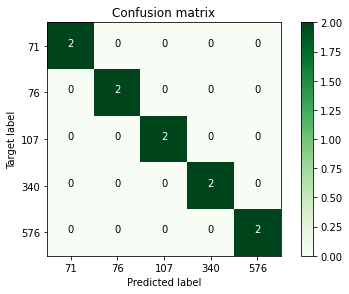

In [ ]:
plot_confusion_matrix(cm=cm,classes=cm_plot_label,title='Confusion matrix')

In [ ]:
precision_array=[]
recall_array=[]

precision = [cm[i,i]/sum(cm[i,:]) for i in range(5)]
recall = [cm[i,i]/sum(cm[:,i]) for i in range(5)]
f1score = [2*precision[i]*recall[i]/(recall[i]+precision[i]) for i in range (5)]

for i in range(5):
  print(f'Precision: {precision[i]} Recall: {recall[i]} F1Score: {f1score[i]} for label {cm_plot_label[i]}')

Precision: 1.0 Recall: 1.0 F1Score: 1.0 for label 71
Precision: 1.0 Recall: 1.0 F1Score: 1.0 for label 76
Precision: 1.0 Recall: 1.0 F1Score: 1.0 for label 107
Precision: 1.0 Recall: 1.0 F1Score: 1.0 for label 340
Precision: 1.0 Recall: 1.0 F1Score: 1.0 for label 576
